# 1. Thermal Gyrosynchrotron Model

## 1.1. Notebook setup

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## 1.2. <a href="https://www.dropbox.com/sh/hkkdw1pdpt76kfb/AACVh44utUvSsedKgkMG8UeJa?dl=0">Download data</a>

Unzip the contents into a folder named <font color='green'>data</font> in the same level as the notebooks folder. The directory structure should end up looking like the following: 
```
thermal-gs
├── data
│   ├── thermal-gs_model.txt
│   ├── thermal-gs.mplstyle
│   ├── ...
├── figures
│   ├── thermal-gs_model.pdf
│   ├── thermal-gs_model.png
│   ├── ...
├── notebooks
│   ├── thermal-gs_model.ipynb
│   ├── ...
.
.
.

## 1.3. Load

In [2]:
# f, o1, x1, o2, x2, o3, x3, o4, x4
data = np.loadtxt('../data/thermal-gs_model.txt').T
plt.style.use('../data/thermal-gs.mplstyle')

data[data < 1e-12] = np.nan # Avoid numerical instabilities getting plotted

## 1.4. Plot

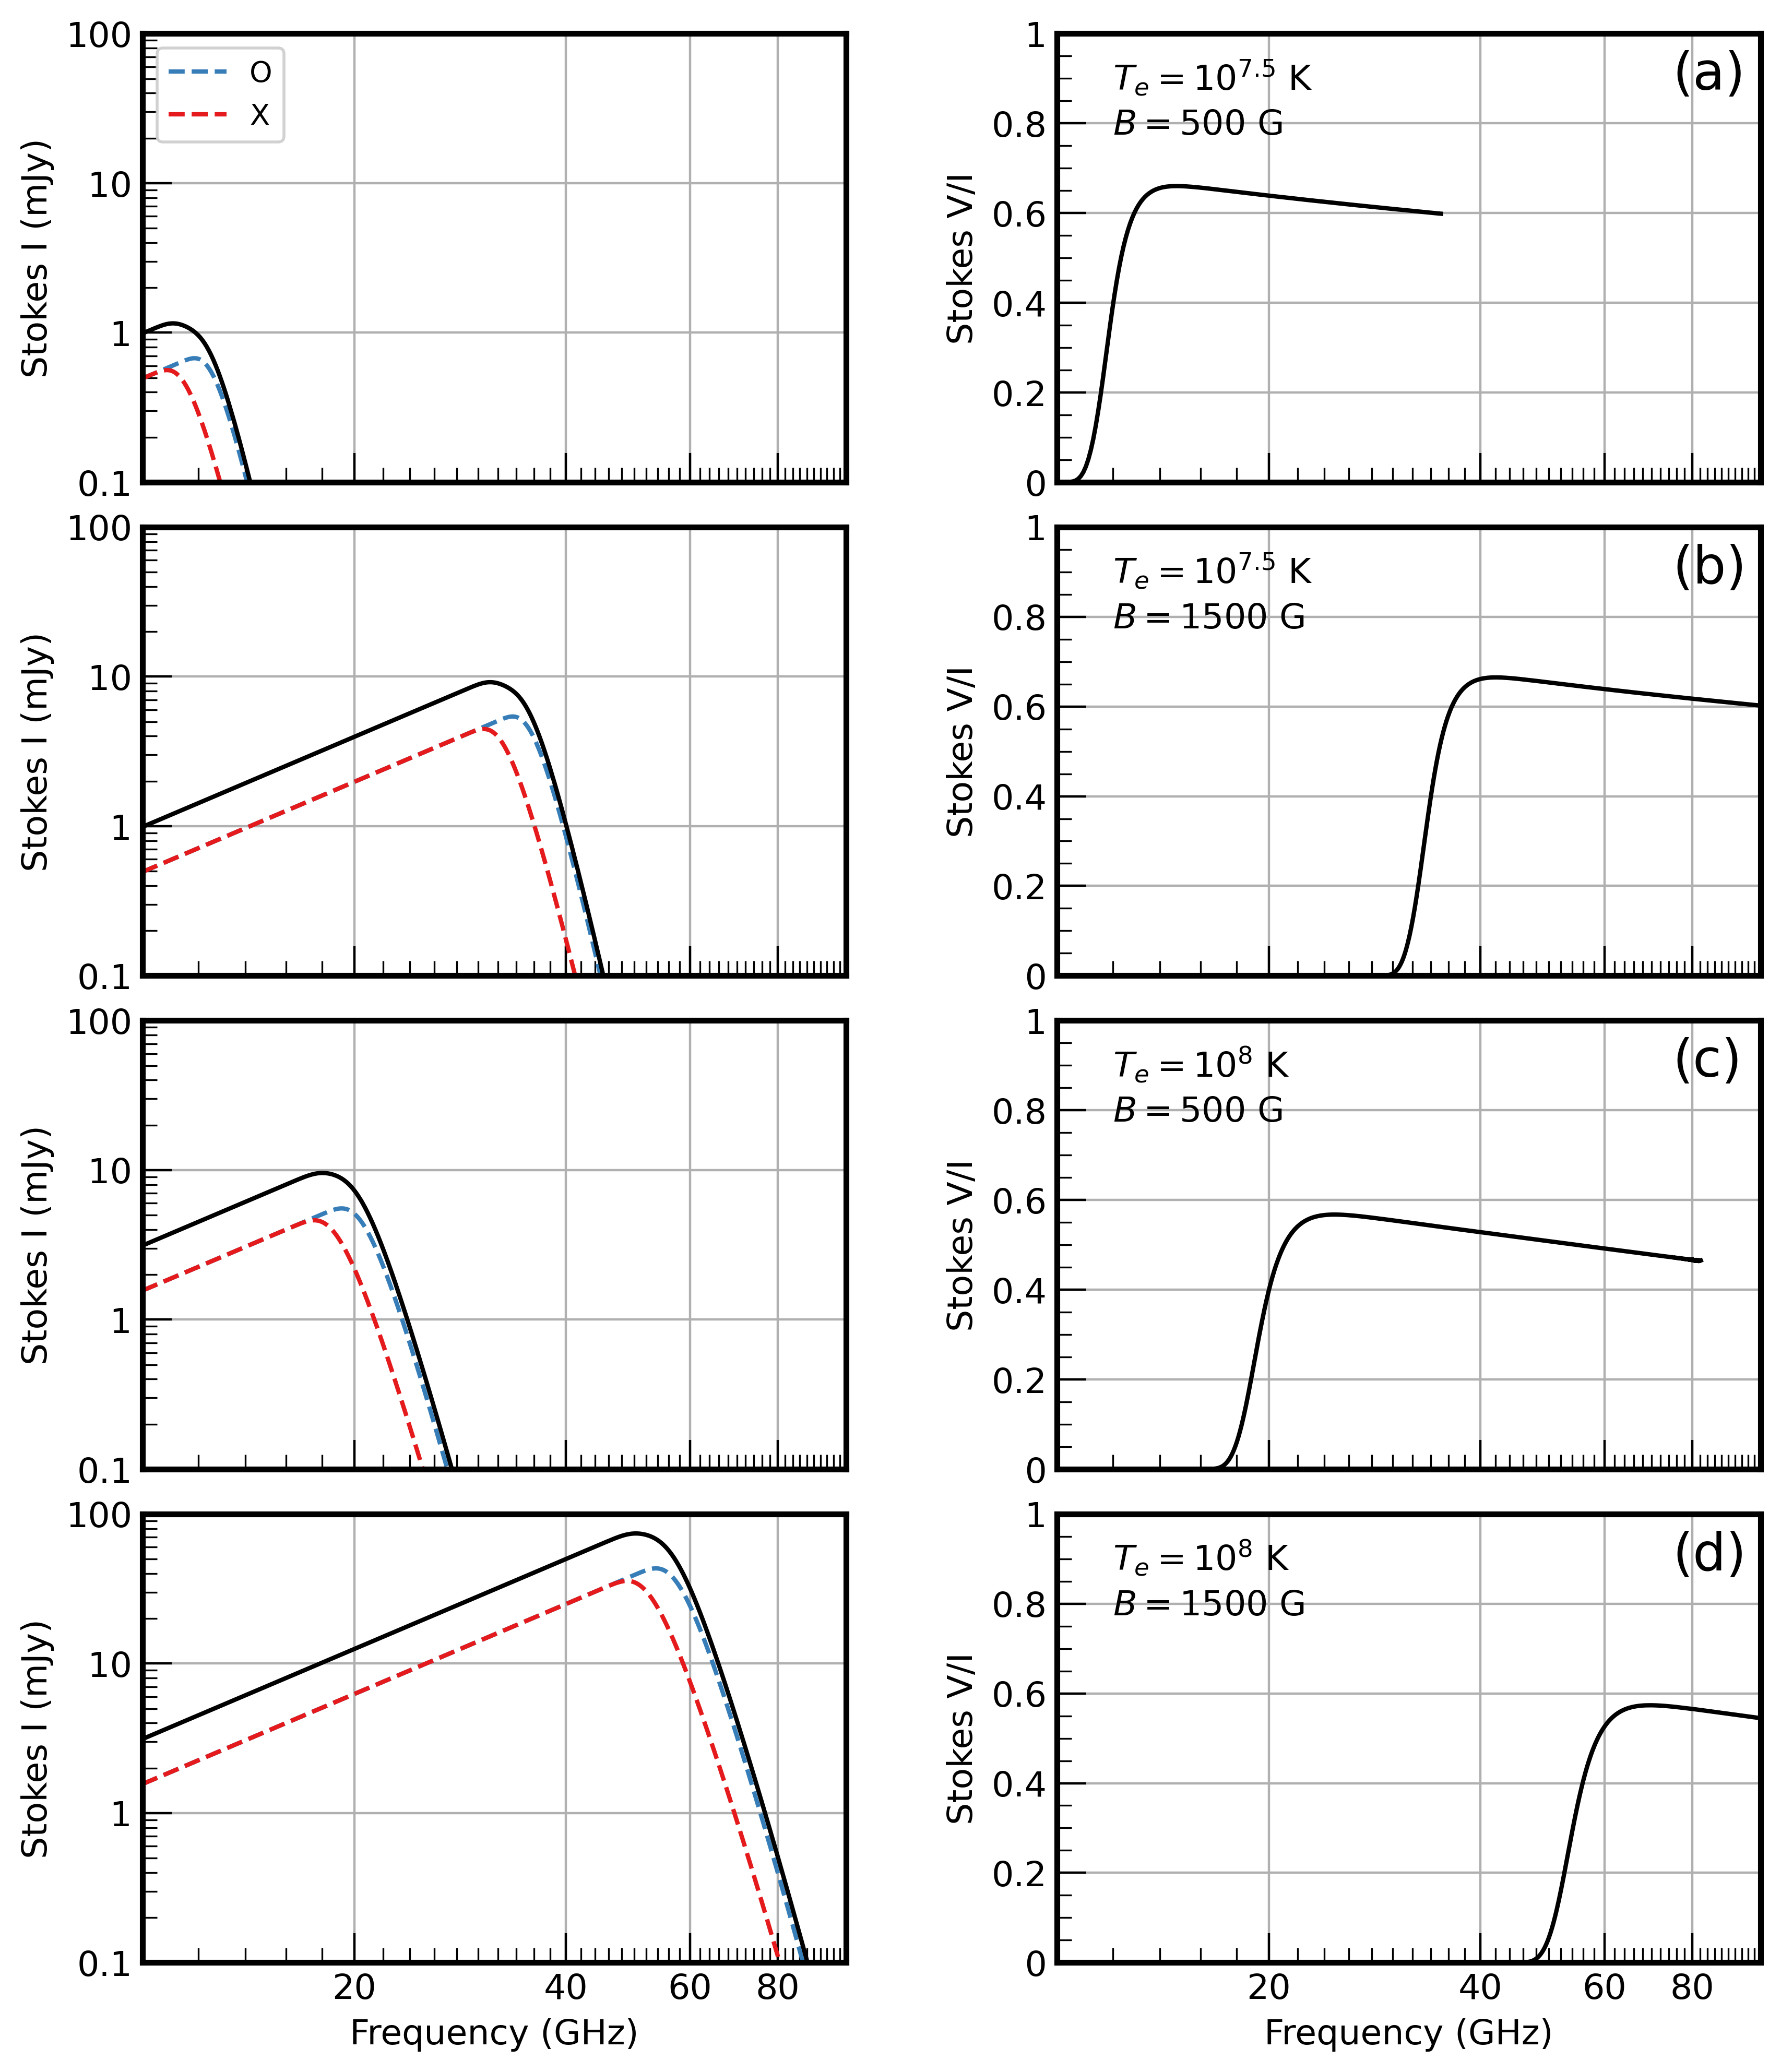

In [3]:
fig,ax = plt.subplots(4, 2, figsize=(10,12))
fig.subplots_adjust(hspace=0.1, wspace=0.3)

for i in range(4):
    # Stokes I  
    ax[i][0].set_ylabel('Stokes I (mJy)')
    ax[i][0].set_xlim(10, 100)
    ax[i][0].set_ylim(0.1, 100)

    ax[i][0].set_xscale('log')
    ax[i][0].set_yscale('log')
    ax[i][0].xaxis.set_major_formatter(mpl.ticker.NullFormatter())
    ax[i][0].xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
    ax[i][0].yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%3.3g'))
    ax[i][0].yaxis.set_minor_formatter(mpl.ticker.NullFormatter())
    ax[i][0].xaxis.set_major_locator(mpl.ticker.LogLocator(base=10, numticks=5, subs=[2, 4, 6, 8]))
    ax[i][0].xaxis.set_minor_locator(mpl.ticker.LogLocator(base=10, numticks=45, subs=np.arange(10, 100, 2)))
    ax[i][0].yaxis.set_major_locator(mpl.ticker.LogLocator(base=10, numticks=4))
    ax[i][0].yaxis.set_minor_locator(mpl.ticker.LogLocator(base=10, numticks=40, subs=np.arange(1,10)*0.1))
    ax[i][0].grid()

    ax[i][0].plot(data[0], data[i*2+1], linestyle='--', label='O')
    ax[i][0].plot(data[0], data[i*2+2], linestyle='--', label='X')
    ax[i][0].plot(data[0], data[i*2+1]+data[i*2+2], color='black')

    # Stokes V/I
    ax[i][1].set_ylabel('Stokes V/I')
    ax[i][1].set_xlim(10, 100)
    ax[i][1].set_ylim(0, 1)

    ax[i][1].set_xscale('log')
    ax[i][1].xaxis.set_major_formatter(mpl.ticker.NullFormatter())
    ax[i][1].xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
    ax[i][1].yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%3.3g'))
    ax[i][1].yaxis.set_minor_formatter(mpl.ticker.NullFormatter())
    ax[i][1].xaxis.set_major_locator(mpl.ticker.LogLocator(base=10, numticks=5, subs=[2, 4, 6, 8]))
    ax[i][1].xaxis.set_minor_locator(mpl.ticker.LogLocator(base=10, numticks=45, subs=np.arange(10, 100, 2)))
    ax[i][1].yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.2))
    ax[i][1].yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.05))
    ax[i][1].grid()

    ax[i][1].plot(data[0], (data[i*2+1]-data[i*2+2])/(data[i*2+1]+data[i*2+2]), color='black')

# Final setup
ax[0][1].text(12, 0.875, r'$T_e=10^{7.5}$ K', fontsize=12) 
ax[0][1].text(12, 0.775, r'$B=500$ G', fontsize=12)
ax[1][1].text(12, 0.875, r'$T_e=10^{7.5}$ K', fontsize=12) 
ax[1][1].text(12, 0.775, r'$B=1500$ G', fontsize=12)
ax[2][1].text(12, 0.875, r'$T_e=10^8$ K', fontsize=12) 
ax[2][1].text(12, 0.775, r'$B=500$ G', fontsize=12)
ax[3][1].text(12, 0.875, r'$T_e=10^8$ K', fontsize=12) 
ax[3][1].text(12, 0.775, r'$B=1500$ G', fontsize=12)

ax[0][1].text(75, 0.875, '(a)', fontsize=18)
ax[1][1].text(75, 0.875, '(b)', fontsize=18)
ax[2][1].text(75, 0.875, '(c)', fontsize=18)
ax[3][1].text(75, 0.875, '(d)', fontsize=18)

ax[0][0].legend(loc=2)

ax[3][0].set_xlabel('Frequency (GHz)')
ax[3][1].set_xlabel('Frequency (GHz)')
ax[3][0].xaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%i'))
ax[3][1].xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())

fig.set_facecolor('white')
plt.savefig('../figures/thermal-gs_model.png', bbox_inches='tight')
plt.savefig('../figures/thermal-gs_model.pdf', bbox_inches='tight')
plt.show()